# Cointegration Mean Reversion Pairs Trading
## 1. Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm



## 2. Get data


In [2]:
df = pd.read_csv("data_df.csv")

In [3]:
stock_x, stock_y = 'AAPL', 'AMZN'
X = df[df.ticker==stock_x]["adj_prc"]
Y = df[df.ticker==stock_y]["adj_prc"]


## 2. Check for cointegration 
The null hyposthesis of `coint` is that the stocks are not cointegrated. The null hypothesis can be rejected if the p-value below 0.05 

In [4]:
_, p_value, _ = coint(X, Y)
if p_value < 0.05:
    print('{0} and {1} are cointegrated!'.format(stock_x, stock_y))
else:
    print('{0} and {1} are NOT cointegrated!'.format(stock_x, stock_y))

AAPL and AMZN are NOT cointegrated!


## 3. Plot stationary linear combination of stocks

In [5]:
print(len(X),len(Y))
X = X.reset_index()
Y = Y.reset_index()

2516 2516


In [6]:
Y = Y.drop(columns=['index'])
X = X.drop(columns=['index'])

const      23.737193
adj_prc     0.778601
dtype: float64


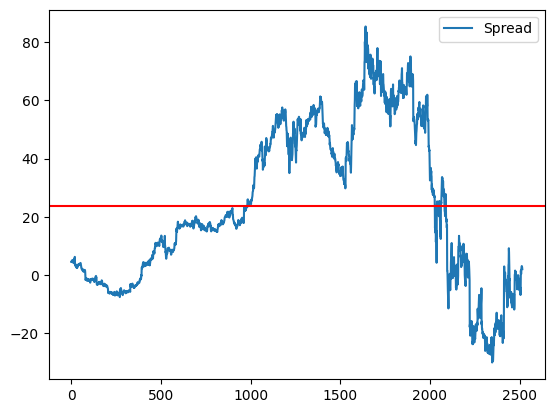

In [7]:
def get_beta(X, Y):
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    print(model.params)
    return model.params['adj_prc']

beta = get_beta(X,Y)
spread = Y - beta * X
plt.figure()
spread["adj_prc"].plot()
plt.axhline(spread.adj_prc.mean(), color='red')
plt.legend(['Spread'])
plt.show()

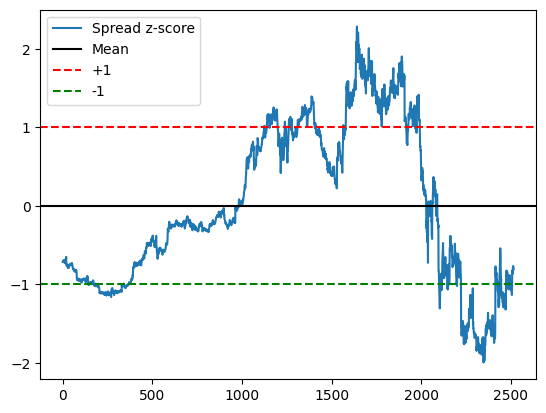

In [20]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

plt.figure()
zscore(spread.adj_prc).plot()
plt.axhline(zscore(spread.adj_prc).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);
plt.show()